In [8]:
import sys
print(sys.version)

3.11.4 (main, Jul  5 2023, 08:40:20) [Clang 14.0.6 ]


In [31]:
import numpy as np
%pylab inline
from pylab import *
from cv2 import *
from skimage.transform import resize
from scipy.signal import convolve2d
import math

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/julian/anaconda3/envs/tutorial/lib/python3.11/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['power', 'random', 'fft', 'resize']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [12]:
def read_im(filepath):
    if filepath[len(filepath)-3:] == 'tif':
        return imread(filepath)/65536.0
    if filepath[len(filepath)-3:] == 'jpg':
        return imread(filepath)/255.0
    else:
        return imread(filepath)

# Task 1.1: Finite Difference Operator

(542, 540)


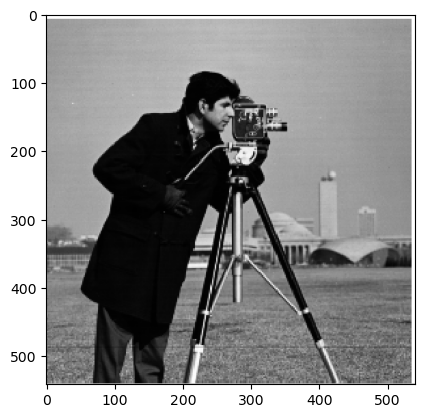

In [50]:
# Get the cameraman image.
cam_man = read_im('../data/cameraman.png')
# Convert it to grayscale.
cam_man_gray = np.mean(cam_man, axis=2) 
print(cam_man_gray.shape)
imshow(cam_man_gray, cmap='gray')

(1, 2)
[[ 1 -1]]


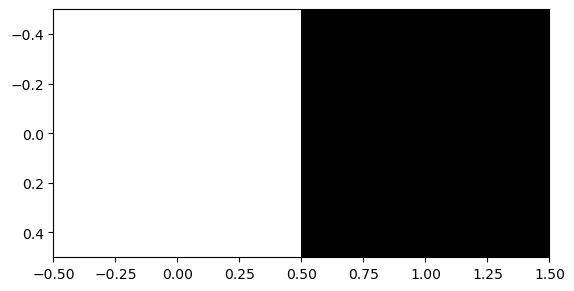

In [51]:
# Code snippet from discussion section 3 notebook.
#dx_op = np.tile(np.array([-1, 0, 1])[None,:], [3, 1]) / 2

# Create the finite difference operator for the partial wrt x
dx_op = np.array([[1, -1]])
print(dx_op.shape)
print(dx_op)
imshow(dx_op, cmap='gray')


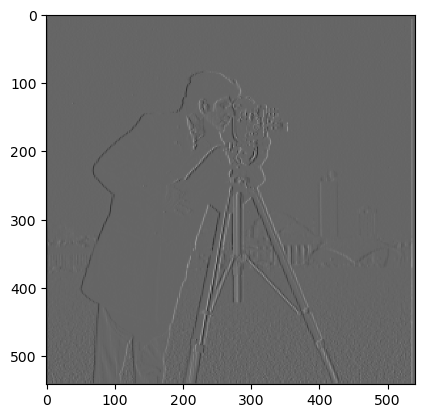

In [55]:
# Take the partial derivative with respect to x by convolving with [1 -1].
cam_man_dx = convolve2d(cam_man_gray, dx_op, mode='same', boundary='fill')
imshow(cam_man_dx, cmap='gray')


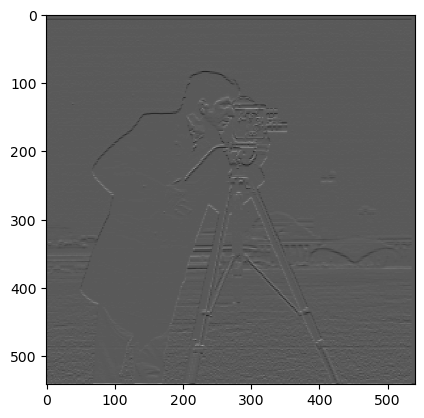

In [56]:
# Take the partial derivative with respect to y by convolving with [1 -1]^T.
dy_op = np.array([[1],
                  [-1]])
cam_man_dy = convolve2d(cam_man_gray, dy_op, mode='same', boundary='fill')
imshow(cam_man_dy, cmap='gray')


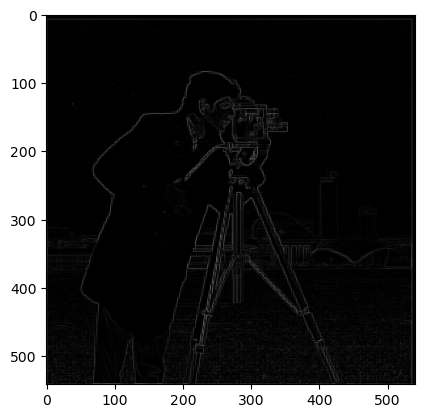

In [83]:
#Take the image gradient magnitude and display it.
#Each point (y,x) should be equal to sqrt(cam_man_dx[y][x]**2 + cam_man_dy[y][x]**2).

cam_man_nabla = np.array(np.zeros_like(cam_man_dx))

for y in range(cam_man_nabla.shape[0]):
    for x in range(cam_man_nabla.shape[1]):
        cam_man_nabla[y][x] = sqrt(cam_man_dx[y][x]**2 + cam_man_dy[y][x]**2)

imshow(cam_man_nabla, cmap='gray')

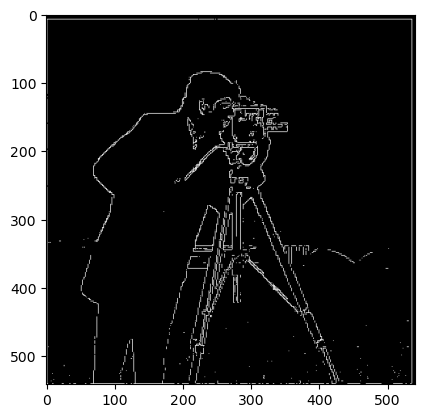

In [71]:
# Binarize the image above some threshold.
cam_man_nabla_binarized = np.array(np.zeros_like(cam_man_nabla))
threshold = 0.2
for y in range(cam_man_nabla.shape[0]):
    for x in range(cam_man_nabla.shape[1]):
        value = cam_man_nabla[y][x] 
        if value >= threshold:
            cam_man_nabla_binarized[y][x] = 1.0

imshow(cam_man_nabla_binarized, cmap='gray')

# Part 1.2: Derivative of Gaussian (DoG) Filter

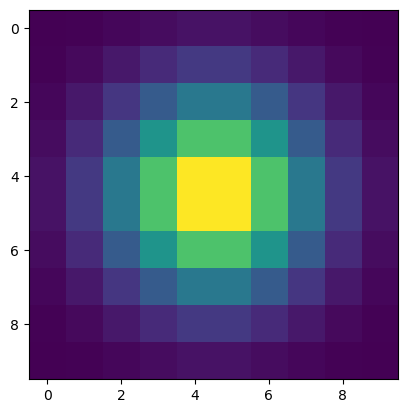

In [131]:
# Creates a Gaussian filter.
# Hint: use cv2.getGaussianKernel() and dot it with its transpose.
def CreateGaussian2D(size, sigma):
    gaussian_1d = cv2.getGaussianKernel(ksize=size, sigma=sigma)
    return np.dot(gaussian_1d, np.transpose(gaussian_1d))

gaussian = CreateGaussian2D(10, 0)
imshow(gaussian)

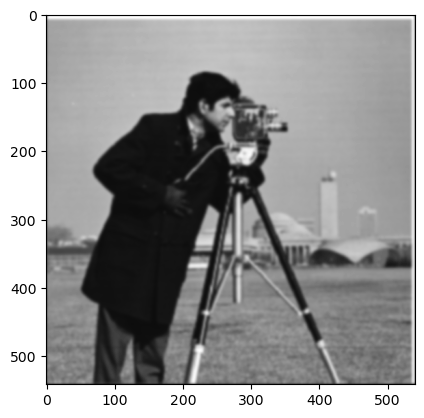

In [110]:
# Blur the original by convolving with the Gaussian.
cam_man_blurred = convolve2d(cam_man_gray, gaussian, mode='same', boundary='fill')
imshow(cam_man_blurred, cmap='gray')

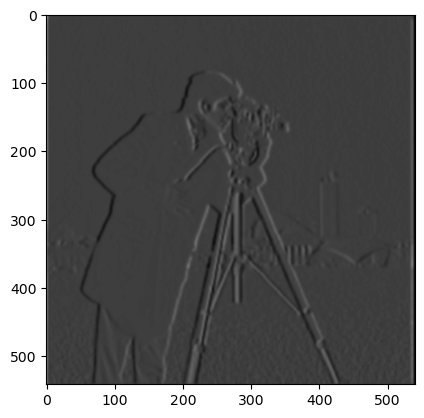

In [111]:
# Convolve the blurred image with partial-x kernel.
cam_man_blurred_dx = convolve2d(cam_man_blurred, dx_op, mode='same', boundary='fill')
imshow(cam_man_blurred_dx, cmap='gray')


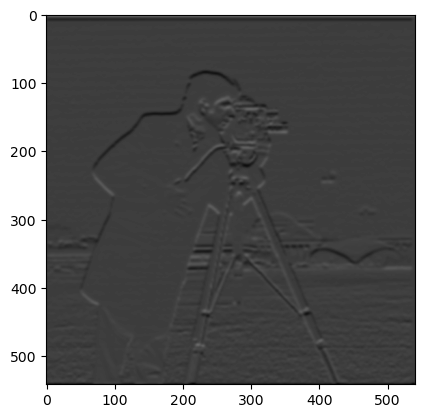

In [112]:
# Convolve the blurred image with partial-y kernel.
cam_man_blurred_dy = convolve2d(cam_man_blurred, dy_op, mode='same', boundary='fill')
imshow(cam_man_blurred_dy, cmap='gray')

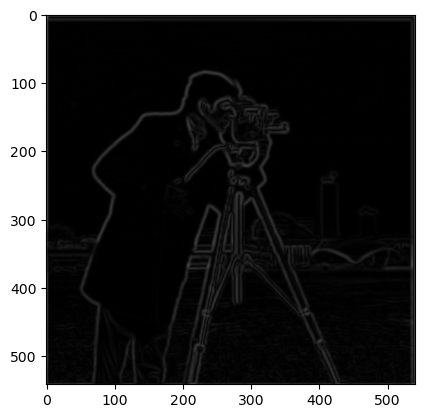

In [113]:
# Make the gradient image again for the blurred image.
cam_man_blurred_nabla = np.array(np.zeros_like(cam_man_dx)) 

for y in range(cam_man_blurred_nabla.shape[0]):
    for x in range(cam_man_blurred_nabla.shape[1]):
        cam_man_blurred_nabla[y][x] = sqrt(cam_man_blurred_dx[y][x]**2 + cam_man_blurred_dy[y][x]**2)

imshow(cam_man_blurred_nabla, cmap='gray')


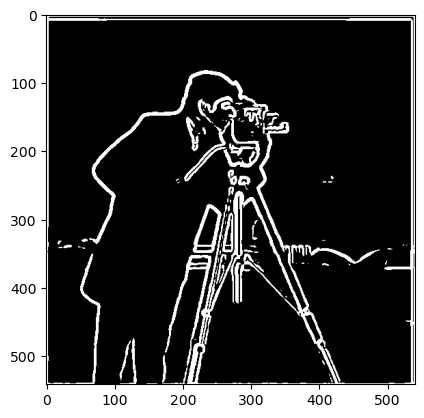

In [119]:
# Binarize the blurred gradient image above some threshold.
cam_man_blurred_nabla_binarized = np.array(np.zeros_like(cam_man_blurred_nabla))
threshold = 0.04
for y in range(cam_man_blurred_nabla.shape[0]):
    for x in range(cam_man_blurred_nabla.shape[1]):
        value = cam_man_blurred_nabla[y][x] 
        if value >= threshold:
            cam_man_blurred_nabla_binarized[y][x] = 1.0

imshow(cam_man_blurred_nabla_binarized, cmap='gray')

#### Take the convolution of the Gaussian with the Finite Difference Operators

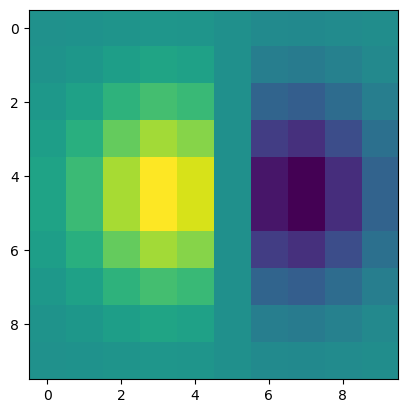

In [120]:
# Convolve gaussian with dx_op
dx_gaussian = convolve2d(gaussian, dx_op, mode='same', boundary='fill')
imshow(dx_gaussian)

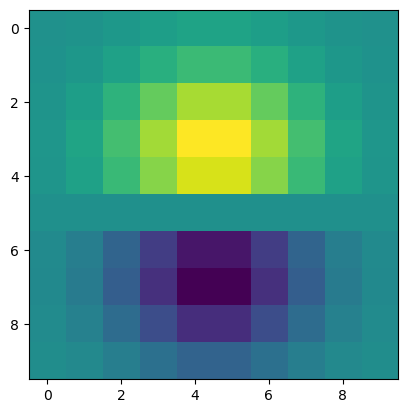

In [121]:
# Convolve gaussian with dy_op
dy_gaussian = convolve2d(gaussian, dy_op, mode='same', boundary='fill')
imshow(dy_gaussian)

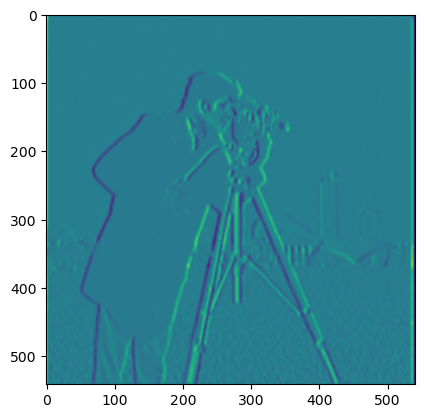

In [122]:
# Convolve original with dx_gaussian
cam_man_dx_gaussian = convolve2d(cam_man_gray, dx_gaussian, mode='same', boundary='fill')
imshow(cam_man_dx_gaussian)

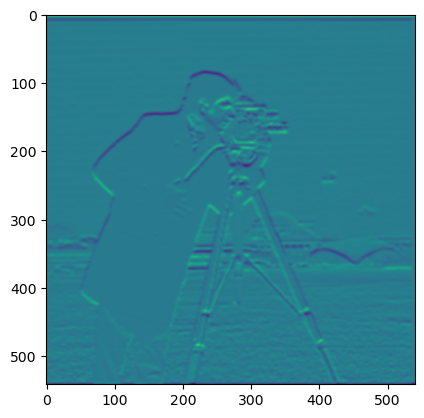

In [123]:
# Convolve original with dy_gaussian
cam_man_dy_gaussian = convolve2d(cam_man_gray, dy_gaussian, mode='same', boundary='fill')
imshow(cam_man_dy_gaussian)

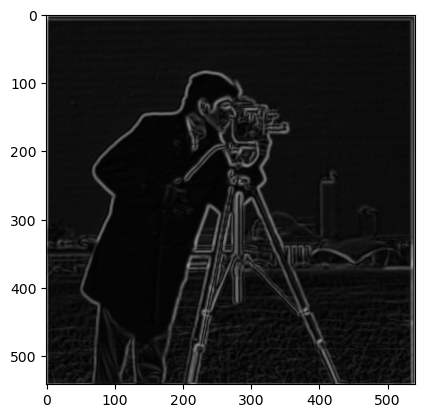

In [124]:
# Make the gradient image again, this time for the DoG images. 
cam_man_DoG_nabla = np.array(np.zeros_like(cam_man_dx_gaussian)) 

for y in range(cam_man_DoG_nabla.shape[0]):
    for x in range(cam_man_DoG_nabla.shape[1]):
        cam_man_DoG_nabla[y][x] = sqrt(cam_man_dx_gaussian[y][x]**2 + cam_man_dy_gaussian[y][x]**2)

imshow(cam_man_DoG_nabla, cmap='gray')

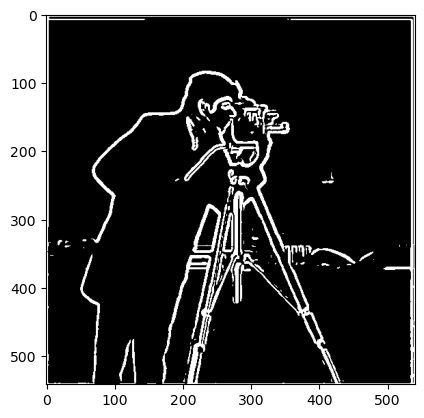

In [125]:
# Binarize the  gradient image again, this time for the DoG task. 
cam_man_DoG_nabla_binarized = np.array(np.zeros_like(cam_man_DoG_nabla))
threshold = 0.04
for y in range(cam_man_DoG_nabla.shape[0]):
    for x in range(cam_man_DoG_nabla.shape[1]):
        value = cam_man_DoG_nabla[y][x] 
        if value >= threshold:
            cam_man_DoG_nabla_binarized[y][x] = 1.0

imshow(cam_man_DoG_nabla_binarized, cmap='gray')

#### Yup, that's the same result as before, as expected.

# Task 2.1: Image "Sharpening"

#### Derive the unsharp mask filter.

In [134]:
def GetHighFrequencies(image, gaussian_kernel):
    # Get convolve image with kernel to get low frequency image
    low_frequencies = convolve2d(image, gaussian_kernel, mode='same', boundary='fill')
    high_frequencies = image - low_frequencies # Does this syntax work the way I think it does?
    return high_frequencies

In [184]:
def Sharpen(image, alpha, kernel_size, kernel_std):
    """
    Takes an image, a sharpen scaling factor, and parameters for a gaussian kernel.
    Returns an image that is the sharpened by the scaling factor.
    """
    # Get the high frequencies, scale them, and add them back to the original.
    return image + alpha*GetHighFrequencies(image, CreateGaussian2D(kernel_size, kernel_std))

In [217]:
def SharpenRGB(image, alpha, kernel_size, kernel_std):
    """
    Calls Sharpen() for all of the color channels and recombines.
    """
    # Grab the color channels.
    channels = [image[:,:,c] for c in range(image.shape[2])]
    # Call sharpen on each color channel, treating them as grayscale images.
    sharpenedChannels = [Sharpen(channel, alpha, kernel_size, kernel_std) for channel in channels]
    # Initialize result image.
    sharpenedImage = np.zeros_like(image)
    for c in range(len(channels)):
        # Create horizontal stack so we can do numpy wizardry.
        grayscaleChannelHStack = np.stack([channels[c]] * 3, axis=-1)
        # Numpy wizardry, assign the values from the sharpened grayscale to the desired color channel.
        sharpenedImage[:,:,c] = grayscaleChannelHStack[:,:,c] 
    return sharpenedImage

In [223]:
taj = read_im('../data/taj.jpg')

In [226]:
taj_sharp = SharpenRGB(taj, 10000, 50, 0)

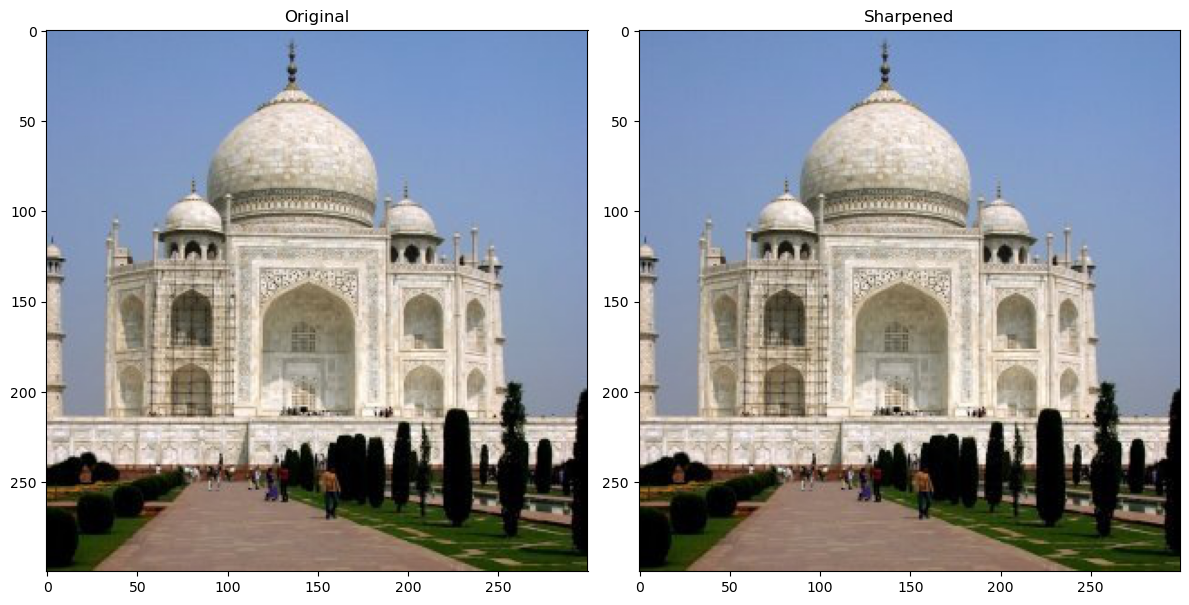

In [227]:
# Set the desired width and height for the figure
fig_width = 12  # Width in inches
fig_height = 6  # Height in inches

# Assuming you have two images, image1 and image2
# Create a figure with two subplots and set the figsize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(fig_width, fig_height))

# Display image1 in the first subplot
ax1.imshow(taj)
ax1.set_title('Original')

# Display image2 in the second subplot
ax2.imshow(taj_sharp)
ax2.set_title('Sharpened')

# Adjust spacing between subplots (optional)
plt.tight_layout()

# Show the figure
plt.show()